# Homework 3

## Message from your Prof
> **Remember for the best way to learn this content, and maximize your learning experience, you must implement these models yourself and only use imports for checking your work**

You can only import classification_report from sklearn evaluation metrics (you do not need to implement classification report), but you have to implement the train_test_split, and the classifiers yourselves. You will need to use numpy or pandas as inputs for your models. You should only use the imports listed below to check your work.

Students that do not practice their own implementations **will be cooked** in their skill assessments. I do not want to hear students complaining they did poorly because the homeworks did not reflect the skill assessments. YOU HAVE BEEN WARNED!!!

<br>
In this assignment, we are working on a list of 1200 bitstrings, where each of them contains 16 bits. <br >
We will apply Agglomerative Clustering, K-means Clustering, and PCA to this dataset. <br >

## Background and Data Information
For a bitstring $S$ in this dataset, we describe $S = \{s_{15}, s_{14}, s_{13}, s_{12}, \ldots, s_{0} \}$, where $s_{15}$ is often known as the most significant bit (MSB) and $s_0$ as the least significant bit (LSB). <br >

There are duplicated bitstrings in this dataset, but they will not affect this assignment. Don't worry about them. <br >

## Equivalence Relation

**This is an important concept to Exercise 1.**

Let's say if we have two bitstrings, $A = \{a_{15}, a_{14}, a_{13}, \ldots, a_{0} \}$ and $B = \{b_{15}, b_{14}, b_{13}, \ldots, b_{0} \}$. <br >

We can flip one bit $a_i$ in $A$ to get another bitstring $A'$, such that the difference of $A$ and $A'$ is only one bit. We define the above transformation to be $A \to A'$. <br >


We call two bitstrings $A$ and $B$ to be **equivalent** ($A \sim B$) if there exists a sequence $A \to C_1 \to C_2 \to \cdots \to C_n \to B$, where $\forall i, C_i$ belongs to the dataset.

It can be seen that equivalence is both __commutative__ ($A \sim B \iff B \sim A$) as well as __transitive__ ($A \sim B, B \sim C \implies A \sim C$). <br >

We can say that the elements in the above sequence $\{ A, C_1, \ldots, C_n, B\}$ form an equivalence class. Given a new bitstring $X$, we can see that if $X \sim C_i$, $1 \le i \le n$, then $X$ will be added to the above equivalence class, and by the transitive property of equivalence relations, $X \sim A$, and $X \sim B$.

### Example

Let's say we have 4 bitstrings, each of them is 4 bits long. They are $0000, 0010, 0110, 1100$, respectively.<br >

We can say $0000 \sim 0110$ because $0000 \to 0010 \to 0110$. <br >

However, $0000 \nsim 1100$. There may be sequences like $0000 \to 1000 \to 1100$ or $0000 \to 0100 \to 1100$, but neither $1000$ nor $0100$ is in our dataset. <br >

Ultimately, $\{0000, 0010, 0110\}$ form an equivalence class, whereas $\{1100\}$ is the other. As a result, there are two classes.

### Libraries that can be used: numpy, scipy, pandas, scikit-learn, matplotlib, seaborn
Any libraries used in the discussion and lecture materials are also allowed.

# Exercises
## Exercise 1 - Agglomerative Clustering (20 points in total)

Using agglomerative clustering with a distance threshold for early stopping, we can calculate the number of equivalence classes by counting the number of clusters. In order to perform agglomerative clustering, we have to consider what parameters may be used: <br >

### Exercise 1.1 - Choosing Parameters (5 points)

 - Explain why you would pick these parameters.
     - Which linkage rule should be used? (single-linkage, complete-linkage, or average-linkage)
     - Which distance function should be used? (Euclidean distance, Manhattan distance, or cosine distance)
     - What should the threshold distance be?

Hints:
 - How the distance threshold works: Whenever two clusters are picked to consider merging them, the distance between those clusters is compared to the distance threshold. If the distance is smaller than the threshold, the clusters merge and the algorithm continues; Otherwise, they will not be merged.
 - How to choose a linkage rule: Think about how you would figure out which equivalence class the string $0001$ belongs to in the previously given example.

1. We would use a single linkage because if every point within clusters are the same and any pair of points between two different clusters if they are close to eachother can be merged
2. we would use manhattan distance because it lets us know how many bits need to be flipped
3. Threshold distance that we will be using is 1


In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('bitstrings.csv') # change filename location based on your setup

In [4]:
df

,b15,b14,b13,b12,b11,b10,b9,b8,b7,b6,b5,b4,b3,b2,b1,b0
0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,0,0
1,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0
2,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0
3,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0
4,0,0,0,0,0,1,1,1,0,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1
1196,1,1,0,1,1,1,1,1,1,0,0,0,1,1,1,0
1197,1,1,0,1,1,1,1,1,1,1,0,0,1,1,1,1
1198,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1


### Exercise 1.2 - Agglomerative Clustering for Equivalence Classes (15 points)

 - Perform the agglomerative clustering with the parameters you picked in the above three questions.
 - Show the frequency(number of members) of each cluster. You are encouraged to create a bar chart to show the distribution as it will help you in Exercise 2, but printing only the numbers is also fine.

Hints:
 - The value of ```distance_threshold``` in the arguments should be **slightly** higher than what you picked. This is because we only merge two clusters when their distance is **strictly smaller** than the threshold.

In [5]:
X=np.array(df)
X

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 1, 0, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       [1, 0, 0, ..., 1, 1, 1]])

In [9]:
def manhattan(p1, p2):
    return np.sum(np.abs(p1-p2))
def calculate_cluster_distance(X,cluster1, cluster2):
    distances=[]
    for i in cluster1:
        for j in cluster2:
            distances.append(manhattan(X[i], X[j]))
    distances=np.array(distances)
    return np.min(distances)

In [8]:
import matplotlib.pyplot as plt

0 : 32
1 : 3
2 : 2
3 : 2
4 : 2
5 : 2
6 : 1
7 : 2
8 : 1
9 : 1
10 : 1
11 : 5
12 : 1
13 : 1
14 : 1
15 : 1
16 : 3
17 : 4
18 : 3
19 : 1
20 : 2
21 : 1
22 : 1
23 : 1
24 : 1
25 : 1
26 : 1
27 : 2
28 : 2
29 : 1
30 : 3
31 : 1
32 : 1
33 : 1
34 : 1
35 : 1
36 : 1
37 : 1
38 : 1
39 : 1
40 : 1
41 : 1
42 : 1
43 : 2
44 : 2
45 : 1
46 : 1
47 : 1
48 : 1
49 : 1
50 : 1
51 : 1
52 : 1
53 : 1
54 : 1
55 : 1
56 : 1
57 : 1
58 : 1
59 : 1
60 : 30
61 : 2
62 : 1
63 : 1
64 : 2
65 : 3
66 : 1
67 : 1
68 : 1
69 : 2
70 : 1
71 : 1
72 : 1
73 : 1
74 : 2
75 : 1
76 : 7
77 : 1
78 : 1
79 : 1
80 : 2
81 : 1
82 : 2
83 : 1
84 : 3
85 : 2
86 : 1
87 : 1
88 : 2
89 : 1
90 : 1
91 : 1
92 : 2
93 : 2
94 : 4
95 : 2
96 : 1
97 : 1
98 : 2
99 : 1
100 : 1
101 : 1
102 : 3
103 : 1
104 : 2
105 : 1
106 : 1
107 : 1
108 : 1
109 : 1
110 : 1
111 : 1
112 : 1
113 : 1
114 : 36
115 : 1
116 : 2
117 : 1
118 : 1
119 : 2
120 : 2
121 : 1
122 : 2
123 : 1
124 : 1
125 : 1
126 : 1
127 : 2
128 : 2
129 : 1
130 : 1
131 : 2
132 : 2
133 : 3
134 : 3
135 : 2
136 : 1
137 : 1
138

<BarContainer object of 613 artists>

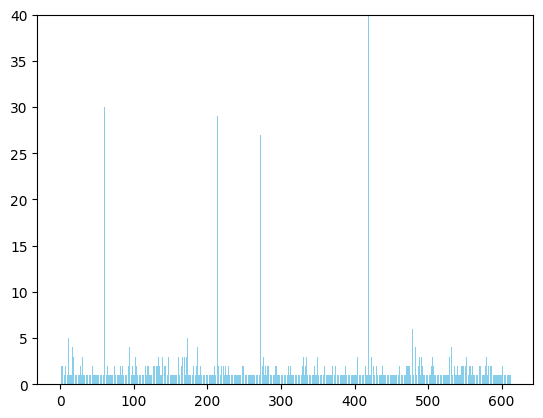

In [10]:
clusters = [[i] for i in range(len(df))]
len(clusters)
def clusters_to_merge(clusters, X, idx, distance_threshold=1.1):
    merge_indices = [idx]
    for j in range(idx + 1, len(clusters)):
        dist = calculate_cluster_distance(X, clusters[idx], clusters[j])
        if dist < distance_threshold:
            merge_indices.append(j)
    return merge_indices

clusters = [[i] for i in range(len(df))]

i = 0
while i < len(clusters):
    merge_indices = clusters_to_merge(clusters, X, i)
    if len(merge_indices) > 1:
        to_merge = [clusters[j] for j in merge_indices]
        merged_cluster = [item for cluster in to_merge for item in cluster]
        for j in sorted(merge_indices, reverse=True):
            clusters.pop(j)
        clusters.insert(i, merged_cluster)
    i += 1

for i in range(len(clusters)):
    print(f'{i} : {len(clusters[i])}')
x = list(range(len(clusters)))
y = [len(item) for item in clusters]
plt.ylim(0, np.max(y))
plt.bar(x, y, color="skyblue")

## Exercise 2 - K-Means Clustering (20 points in total)

Let's see how k-means behave differently from agglomerative clustering.

### Exercise 2.1 - K-Means Clustering for Equivalence Classes (10 points)
 - Re-cluster the dataset with k-means, but with the number of clusters you obtained from Exercise 1.
 - Show the frequency(number of members) of each cluster. Again, you are encouraged to create a bar chart, but printing the numbers is also fine.

In [155]:
X=np.array(df)
X

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 1, 0, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       [1, 0, 0, ..., 1, 1, 1]])

In [12]:
len(clusters)

613

In [13]:
k=len(clusters) 
indexes=np.random.choice(len(X), k, replace=False)
centers=X[indexes]
centers

array([[1, 0, 1, ..., 1, 1, 1],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 1]])

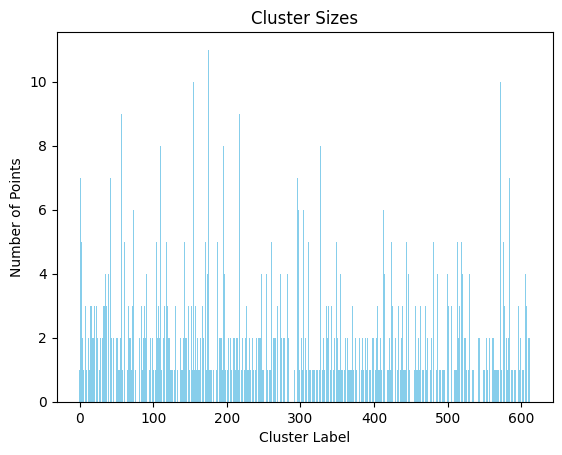

In [19]:
def K_means(X,k):
    indexes=np.random.choice(len(X), k, replace=False)
    centers=X[indexes]
    labels=np.zeros(len(X))
    max_iter=2
    for _ in range(max_iter):
        for i in range(len(X)):
            min_index=0
            min_dist=float('inf')
            for j in range(len(centers)):
                if manhattan(X[i],centers[j])<min_dist:
                    min_index=j
                    min_dist=manhattan(X[i],centers[j])
            labels[i]=min_index
        new_centers= np.array([X[labels == i].mean(axis=0) if np.sum(labels == i) > 0 else centers[i] for i in range(k)])
        centers = new_centers
    return labels
labels=K_means(X,k=len(clusters))
counts=pd.Series(labels).value_counts()
plt.bar(counts.index, counts.values, color="skyblue")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Points")
plt.title("Cluster Sizes")
plt.show()

### Exercise 2.2 - Difference between Agglomerative Clustering and K-Means Clustering (10 points)

Compare the result from Exercise 2.1 with that from Exercise 1.2, and explain
 - How the two results are different
 - Why there is such a difference

Looking at the Agglomerative clustering we see that there are some peaks that have a significantly higher freqency than others when compared to the kmeans. While kmeans looking at the graph we see that there are a lot more frequent peaks but each peak has a low frequencey when compared to the peaks in Agglomerative. This is because Agglomerative merges two clusters togther if they are withing a certain dist which can lead to very long chains while Kmeans iteratively updates the centroids so that our number of clusters meet our clusters requirements which causes it the have more spread out cluster frequencies.

## Exercise 3 - Principal Component Analysis (30 points in total)

We can visualize how the bitstrings are distributed using principal component analysis.

### Exercise 3.1 - Generate 2 Clusters (10 points)

 - Re-do the k-means clustering on our dataset again, but this time we only consider ```k=2```.
 - Show the frequency(number of members) of each cluster.

In [20]:
import pandas as pd
import numpy as np
df = pd.read_csv('bitstrings.csv') 

In [21]:
X=np.array(df)
X

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 1, 0, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       [1, 0, 0, ..., 1, 1, 1]])

In [22]:
k=2 
indexes=np.random.choice(len(X), k, replace=False)
centers=X[indexes]
centers

array([[1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1],
       [0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1]])

In [25]:
labels=np.zeros(len(X))
max_iter=2
for _ in range(max_iter):
    for i in range(len(X)):
        min_index=0
        min_dist=float('inf')
        for j in range(len(centers)):
            if manhattan(X[i],centers[j])<min_dist:
                min_index=j
                min_dist=manhattan(X[i],centers[j])
        labels[i]=min_index
    new_centers= np.array([X[labels == i].mean(axis=0) for i in range(k)])
    centers = new_centers
pd.Series(labels).value_counts()

0.0    670
1.0    530
Name: count, dtype: int64

### Exercise 3.2 - PCA for Feature Extraction (20 points)

 - Retrieve the projected dataset with PCA, using ```n_components=2```.
 - Generate a scatter plot to visualize the projected points, where they should be colored differently based on the assigned cluster in Exercise 3.1.
 - In the first principal component, **print out** the weights of all features.
 - Report which feature has the **highest positive** weight in the first principal component.

In [26]:
X=df-np.mean(df,axis=0)
X

,b15,b14,b13,b12,b11,b10,b9,b8,b7,b6,b5,b4,b3,b2,b1,b0
0,-0.488333,-0.488333,-0.241667,-0.641667,-0.295833,-0.498333,0.425,0.429167,-0.366667,0.320833,0.579167,0.565,0.286667,0.425,-0.490833,-0.5675
1,-0.488333,-0.488333,-0.241667,-0.641667,-0.295833,-0.498333,0.425,0.429167,-0.366667,-0.679167,0.579167,0.565,0.286667,0.425,-0.490833,-0.5675
2,-0.488333,-0.488333,-0.241667,-0.641667,-0.295833,-0.498333,-0.575,0.429167,-0.366667,-0.679167,0.579167,0.565,0.286667,0.425,-0.490833,-0.5675
3,-0.488333,-0.488333,-0.241667,-0.641667,-0.295833,-0.498333,0.425,0.429167,-0.366667,-0.679167,0.579167,0.565,0.286667,0.425,-0.490833,-0.5675
4,-0.488333,-0.488333,-0.241667,-0.641667,-0.295833,0.501667,0.425,0.429167,-0.366667,-0.679167,0.579167,0.565,0.286667,0.425,-0.490833,-0.5675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.511667,0.511667,-0.241667,0.358333,0.704167,0.501667,0.425,0.429167,0.633333,-0.679167,-0.420833,-0.435,0.286667,0.425,0.509167,0.4325
1196,0.511667,0.511667,-0.241667,0.358333,0.704167,0.501667,0.425,0.429167,0.633333,-0.679167,-0.420833,-0.435,0.286667,0.425,0.509167,-0.5675
1197,0.511667,0.511667,-0.241667,0.358333,0.704167,0.501667,0.425,0.429167,0.633333,0.320833,-0.420833,-0.435,0.286667,0.425,0.509167,0.4325
1198,0.511667,0.511667,-0.241667,0.358333,0.704167,0.501667,0.425,0.429167,0.633333,0.320833,0.579167,0.565,0.286667,0.425,0.509167,0.4325


In [28]:

C= (X.T @ X)/(len(X)-1)
vals,vectors=np.linalg.eigh(C)
idx = np.argsort(vals)[::-1]
vals=vals[idx]
vectors=vectors[:,idx]   
proj = X @ vectors[:, :2]
proj

,0,1
0,0.645455,0.339687
1,0.898510,0.457622
2,0.485712,0.487746
3,0.898510,0.457622
4,1.149512,0.334574
...,...,...
1195,0.216941,-0.542501
1196,0.604955,-0.590158
1197,-0.036115,-0.660435
1198,0.127785,-0.533934


In [ ]:
# all weights of first pca
vectors[:,0]

array([-0.3214412 ,  0.30603522,  0.10219612, -0.02701849,  0.00050516,
        0.25100215,  0.41279827,  0.41367493, -0.3453021 , -0.25305536,
        0.11678812,  0.04711135,  0.19344383,  0.01279818,  0.00656396,
       -0.38801464])

In [ ]:
#which feature has the highest positve weight
np.argmax(vectors[:,0])

np.int64(7)

In [33]:
import seaborn as sns
import matplotlib_inline as plt

In [34]:
proj['Cluster']= labels.astype(int)

<Axes: xlabel='0', ylabel='1'>

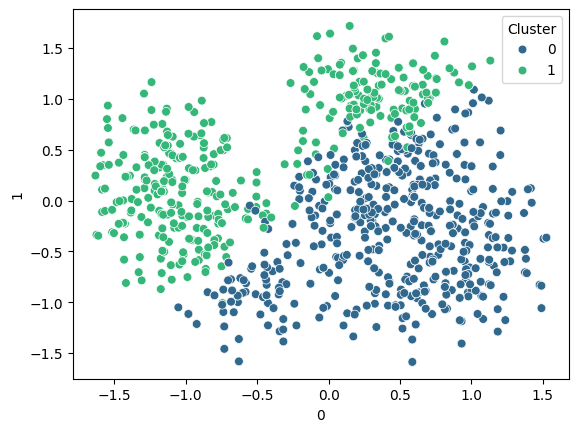

In [35]:

sns.scatterplot(data=proj, x=proj[0], y=proj[1], hue=proj["Cluster"], palette="viridis", s=40)

## Exercise 4 - Singular Value Decomposition (25 points in total)

Let's decompose our data set into left and right matrices to find unknown structure in our data

### Exercise 4.1 - Generate the [SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) (10 points)

 - Generate multiple SVD's using 2, 3 and 4 components ```k=2, k=3 and k=4```.
 Give each SVD it's own python variable.
 - Calculate a pairwise cosine similarity of our kxn matrix for n features (should result in an nxn matrix)
 - Generate Pair plots for the left and right matrices.
 - Evaluate your results and what can you extract from the results of k=2, k=3 and k=4 dimensional reductions?

**Before performing SVD, let's first calculate our Eigen values and Eigen vectors of our matrix**

In [167]:
eigen_values, eigen_vectors = np.linalg.eig(np.array(df).T @ np.array(df))

In [ ]:
# Let's evaluate our values. You can use this for your final evaluation for 4.1
eigen_values

array([5560.91998098,  774.88748042,  586.3344905 ,  473.08470787,
        333.56242611,  302.35801968,  267.84917439,  250.33232478,
        210.71729272,  173.17591399,  143.04620217,  104.01125393,
        128.95448083,  119.45970652,  113.53343526,  115.77310985])

In [169]:
from sklearn.decomposition import TruncatedSVD
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [170]:
# Here we generate an SVD using k = 5 yielding u,s,v of mx5, 5x5, nx5.T
X = df.values
U, s, Vt = np.linalg.svd(X, full_matrices=False)

In [171]:
k = 5
U_k = U[:, :k]                # m × 5
s_k = s[:k]                   # length-5 vector
Vt_k = Vt[:k, :]              # 5 × n

In [172]:
explained_variance = (s_k**2) / (X.shape[0] - 1)
total_var = (s**2).sum() / (X.shape[0] - 1)
explained_variance_ratio = explained_variance / total_var

print("Explained variance ratio:", explained_variance_ratio) # Prints the explained variance for each of the 5 components
print("Sum of top-5 ratios:", explained_variance_ratio.sum()) # Prints the sum of the 5 from above
sigma_matrix = np.diag(s_k)  # Creates the sigma matrix from the singular values
print("Sigma matrix:\n", sigma_matrix) # Prints the sigma matrix
print("Singular values:", s_k) # Our singular values

Explained variance ratio: [0.5757838  0.08023271 0.06070972 0.04898371 0.03453742]
Sum of top-5 ratios: 0.8002473685946399
Sigma matrix:
 [[74.57157623  0.          0.          0.          0.        ]
 [ 0.         27.83680083  0.          0.          0.        ]
 [ 0.          0.         24.21434473  0.          0.        ]
 [ 0.          0.          0.         21.75051052  0.        ]
 [ 0.          0.          0.          0.         18.26369147]]
Singular values: [74.57157623 27.83680083 24.21434473 21.75051052 18.26369147]


In [173]:
# We will define our cosine similarity function
def cosine_similarity(a, b):
    """Calculates the cosine similarity between two vectors."""
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

In [174]:
right_matrix = pd.DataFrame(Vt_k)
print("Right matrix shape:", right_matrix.shape) # lets check the shape

Right matrix shape: (5, 16)


In [175]:
right_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.224738,-0.231620,-0.128592,-0.310244,-0.147987,-0.243458,-0.281356,-0.282752,-0.175377,-0.322661,-0.192425,-0.195697,-0.341603,-0.281952,-0.255848,-0.266339
1,-0.340002,0.292540,0.066576,-0.091186,-0.035265,0.212901,0.375147,0.377218,-0.383869,-0.302709,0.091712,0.054918,0.142340,-0.043132,-0.068585,-0.423359
2,0.325881,0.307351,-0.027253,-0.377403,-0.162040,-0.059054,0.046899,0.179557,-0.065260,0.029107,-0.403549,0.552484,-0.181907,-0.097216,-0.175877,0.212853
3,-0.216463,-0.353458,0.219492,-0.210434,-0.439688,-0.286455,0.125396,0.001257,-0.099859,0.260307,0.257212,0.294463,-0.102176,0.427541,0.117092,-0.084289
4,0.101103,0.239995,0.116768,0.261725,-0.054778,-0.509751,0.162442,-0.225142,-0.018983,-0.278692,-0.422142,-0.115965,0.248836,0.407471,0.010053,-0.111304


In [176]:
X.shape

(1200, 16)

**Generate code for performing a pairwise calculation of our features using cosine_similarity**

In [177]:
def cosine_similarity_2(V):
    return (V @ V.T) / (np.linalg.norm(V, axis=1, keepdims=True)@ np.linalg.norm(V, axis=1, keepdims=True).T)

**Let's extract our left matrix** This is similar to looking at customers with similar movie viewing habits

In [178]:
left_matrix = pd.DataFrame((U_k * s_k) / s_k)
print("Left matrix shape:", left_matrix.shape) #let's check the shape

Left matrix shape: (1200, 5)


In [179]:
left_matrix

,0,1,2,3,4
0,-0.025458,0.024985,0.005178,0.058114,-0.012221
1,-0.021131,0.035859,0.003976,0.046146,0.003039
2,-0.017358,0.022382,0.002039,0.040381,-0.005855
3,-0.021131,0.035859,0.003976,0.046146,0.003039
4,-0.024396,0.043507,0.001537,0.032976,-0.024872
...,...,...,...,...,...
1195,-0.040810,0.000530,-0.001909,-0.051564,0.028016
1196,-0.037239,0.015738,-0.010699,-0.047688,0.034110
1197,-0.045137,-0.010345,-0.000707,-0.039596,0.012756
1198,-0.050342,-0.005077,0.005444,-0.014232,-0.016707


In [180]:
def SVD(X,k):
    values,vectors= np.linalg.eigh(X.T @ X)
    values = values[::-1]
    vectors = vectors[:, ::-1]
    s= np.sqrt(values)
    U=np.zeros((len(X),len(s)))
    for i in range(len(s)):
        if s[i] > 1e-12:
            U[:, i] = (X@ vectors[:, i]) / s[i]
    U = U[:, :k]
    S = np.diag(s[:k])
    vectors = vectors.T[:k, :]
    return U, S, vectors,s

In [181]:
svd_2= SVD(X,2)
svd_3= SVD(X,3)
svd_4= SVD(X,4)

In [182]:
sim_2=cosine_similarity_2(svd_2[2])
sim_2

array([[1.00000000e+00, 5.97462534e-17],
       [5.97462534e-17, 1.00000000e+00]])

In [183]:
sim_3=cosine_similarity_2(svd_3[2])
sim_3

array([[ 1.00000000e+00,  5.97462534e-17,  1.60715342e-16],
       [ 5.97462534e-17,  1.00000000e+00, -3.43212246e-16],
       [ 1.60715342e-16, -3.43212246e-16,  1.00000000e+00]])

In [184]:
sim_4=cosine_similarity_2(svd_4[2])
sim_4

array([[ 1.00000000e+00,  5.97462534e-17,  1.60715342e-16,
         5.74395934e-17],
       [ 5.97462534e-17,  1.00000000e+00, -3.43212246e-16,
         7.22262781e-17],
       [ 1.60715342e-16, -3.43212246e-16,  1.00000000e+00,
         1.99951114e-16],
       [ 5.74395934e-17,  7.22262781e-17,  1.99951114e-16,
         1.00000000e+00]])

In [185]:
svd_2[1]

array([[74.57157623,  0.        ],
       [ 0.        , 27.83680083]])

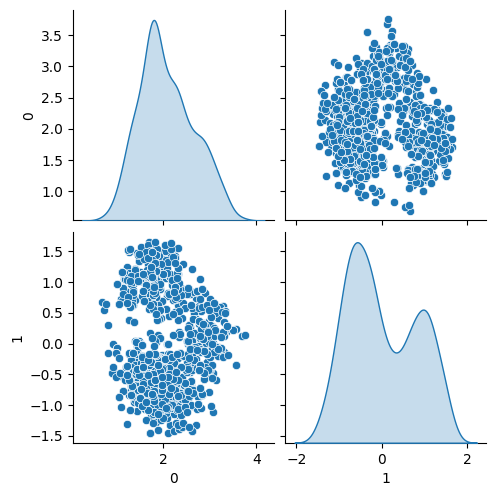

In [186]:
left_matrix_2= pd.DataFrame((svd_2[0] @ svd_2[1]))
sns.pairplot(left_matrix_2, diag_kind="kde")

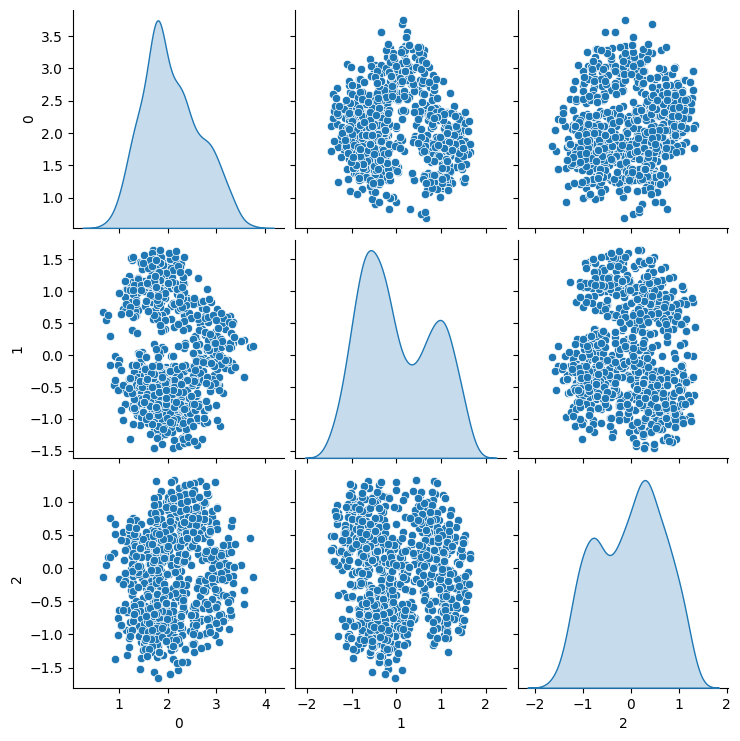

In [187]:
left_matrix_3= pd.DataFrame((svd_3[0] @ svd_3[1]))
sns.pairplot(left_matrix_3, diag_kind="kde")

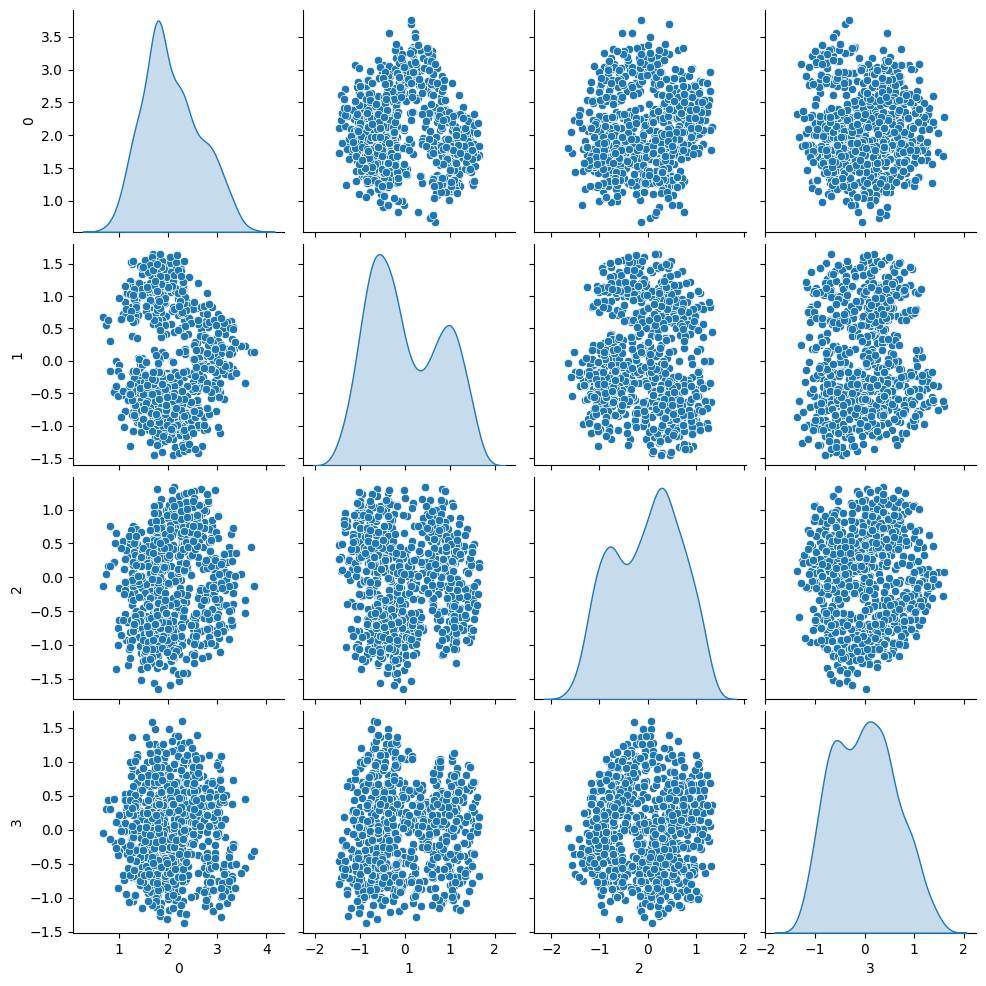

In [188]:
left_matrix_4= pd.DataFrame((svd_4[0] @ svd_4[1]))
sns.pairplot(left_matrix_4, diag_kind="kde")

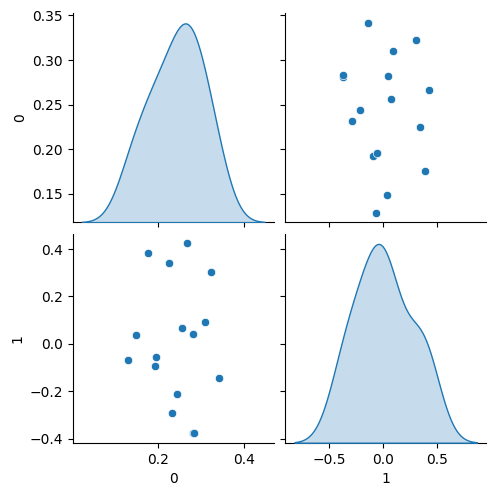

In [189]:
right_matrix_2= pd.DataFrame(svd_2[2].T)
sns.pairplot(right_matrix_2, diag_kind="kde")

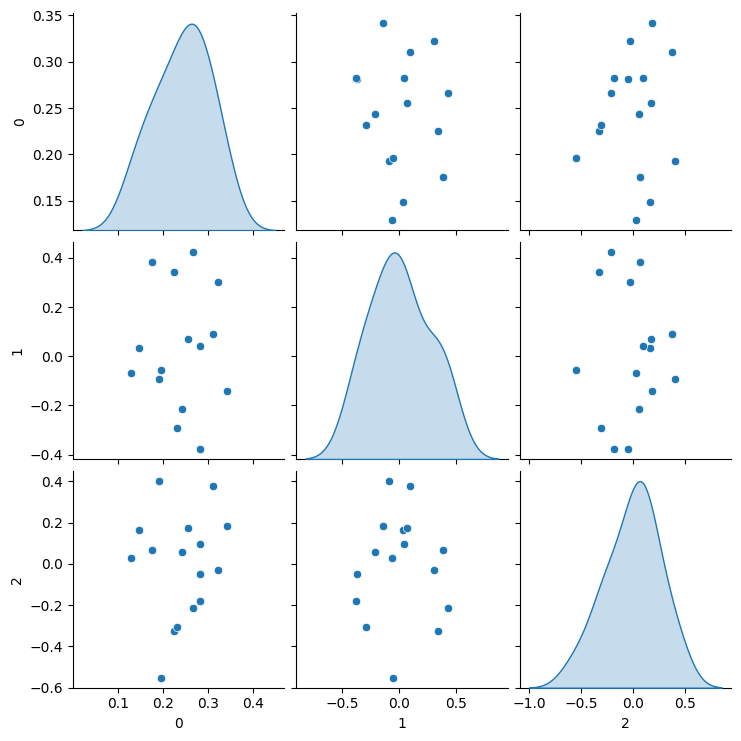

In [190]:
right_matrix_3= pd.DataFrame(svd_3[2].T)
sns.pairplot(right_matrix_3, diag_kind="kde")

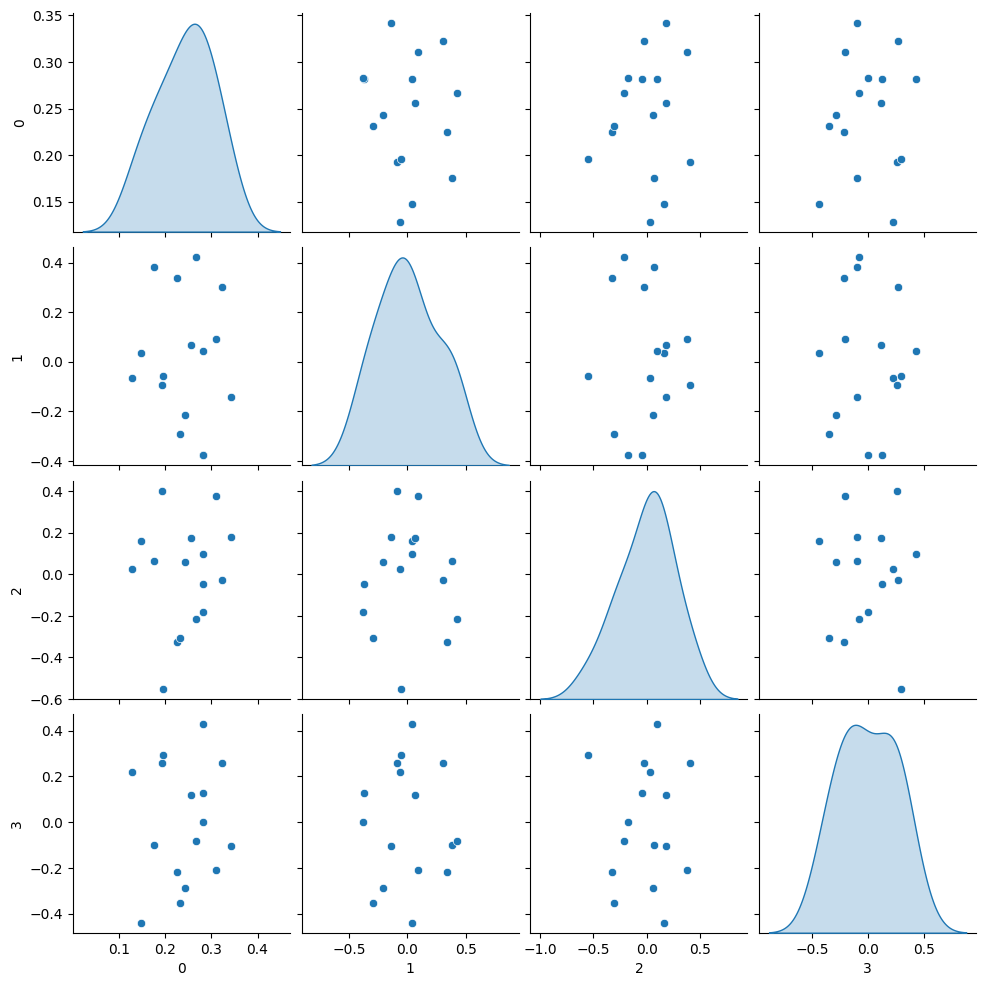

In [191]:
right_matrix_4= pd.DataFrame(svd_4[2].T)
sns.pairplot(right_matrix_4, diag_kind="kde")

**Explain your interpretation for each of the SVD's you generated for k=2, 3, 4**

In [192]:
((svd_2[3][:2]**2)/(X.shape[0]-1))/((svd_2[3][:2]**2).sum() / (X.shape[0] - 1))

array([0.87769712, 0.12230288])

looking at these results we can see that PC1 exaplins our data the best

In [193]:
((svd_3[3][:3]**2)/(X.shape[0]-1))/((svd_3[3][:3]**2).sum() / (X.shape[0] - 1))

array([0.80335249, 0.11194331, 0.0847042 ])

we can see that PC1 does the best with PC3 being the least helpful

In [194]:
((svd_4[3][:4]**2)/(X.shape[0]-1))/((svd_4[3][:4]**2).sum() / (X.shape[0] - 1))

array([0.75196072, 0.10478211, 0.07928553, 0.06397163])

Once again PC1 is the best while the other three seem to explain around the same amount of variance.

### Exercise 4.2 - Generate Clusters (15 points)

 - Re-do the k-means clustering on our dataset again for the three different components created by you above, of the left matrix.
 - Show the frequency (number of members) of each cluster.
 - Generate clusters from 2 to 10
 - Use the [silhouette](https://scikit-learn.org/1.5/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) method to choose the best k clusters

In [195]:
from sklearn.metrics import silhouette_score

In [196]:
a=np.array(left_matrix_2)
best_k=0
best_score=float('-inf')
for i in range(2,11):
    labels=K_means(a,k=i)
    print(f'{i}: {pd.Series(labels).value_counts()}')
    if silhouette_score(left_matrix_2, labels)>best_score:
        best_k=i
        best_score =silhouette_score(left_matrix_2, labels)
print(f"The best K_cluster={best_k}")

2: 0.0    671
1.0    529
Name: count, dtype: int64
3: 0.0    844
2.0    309
1.0     47
Name: count, dtype: int64
4: 3.0    344
1.0    337
0.0    300
2.0    219
Name: count, dtype: int64
5: 4.0    608
2.0    231
0.0    140
1.0    116
3.0    105
Name: count, dtype: int64
6: 1.0    338
3.0    266
2.0    234
4.0    168
0.0    139
5.0     55
Name: count, dtype: int64
7: 3.0    204
5.0    197
4.0    196
1.0    180
6.0    149
2.0    143
0.0    131
Name: count, dtype: int64
8: 7.0    262
4.0    238
5.0    166
2.0    152
3.0    141
0.0     98
1.0     74
6.0     69
Name: count, dtype: int64
9: 5.0    430
2.0    235
7.0    222
1.0    168
6.0     62
3.0     48
4.0     18
8.0     13
0.0      4
Name: count, dtype: int64
10: 8.0    308
3.0    273
2.0    130
1.0     92
9.0     84
4.0     80
0.0     75
7.0     56
6.0     51
5.0     51
Name: count, dtype: int64
The best K_cluster=2


In [197]:
a=np.array(left_matrix_3)
best_k=0
best_score=float('-inf')
for i in range(2,11):
    labels=K_means(a,k=i)
    print(f'{i}: {pd.Series(labels).value_counts()}')
    if silhouette_score(left_matrix_3, labels)>best_score:
        best_k=i
        best_score =silhouette_score(left_matrix_3, labels)
print(f"The best K_cluster={best_k}")

2: 1.0    670
0.0    530
Name: count, dtype: int64
3: 1.0    571
2.0    388
0.0    241
Name: count, dtype: int64
4: 0.0    386
1.0    334
3.0    254
2.0    226
Name: count, dtype: int64
5: 4.0    396
0.0    288
3.0    209
2.0    154
1.0    153
Name: count, dtype: int64
6: 0.0    215
5.0    215
1.0    203
3.0    197
2.0    187
4.0    183
Name: count, dtype: int64
7: 5.0    301
1.0    220
2.0    204
4.0    172
0.0    147
6.0     81
3.0     75
Name: count, dtype: int64
8: 0.0    232
5.0    222
4.0    185
1.0    176
2.0    123
6.0    117
7.0     86
3.0     59
Name: count, dtype: int64
9: 7.0    261
5.0    196
6.0    161
2.0    149
0.0    116
3.0    111
8.0     90
1.0     58
4.0     58
Name: count, dtype: int64
10: 1.0    220
4.0    173
7.0    147
0.0    142
9.0    114
2.0     98
3.0     97
6.0     95
8.0     87
5.0     27
Name: count, dtype: int64
The best K_cluster=4


In [198]:
a=np.array(left_matrix_4)
best_k=0
best_score=float('-inf')
for i in range(2,11):
    labels=K_means(a,k=i)
    print(f'{i}: {pd.Series(labels).value_counts()}')
    if silhouette_score(left_matrix_4, labels)>best_score:
        best_k=i
        best_score =silhouette_score(left_matrix_4, labels)
print(f"The best K_cluster={best_k}")

2: 0.0    905
1.0    295
Name: count, dtype: int64
3: 2.0    501
1.0    487
0.0    212
Name: count, dtype: int64
4: 0.0    510
2.0    292
1.0    229
3.0    169
Name: count, dtype: int64
5: 4.0    501
1.0    364
0.0    125
3.0    115
2.0     95
Name: count, dtype: int64
6: 3.0    253
2.0    216
0.0    213
4.0    200
5.0    165
1.0    153
Name: count, dtype: int64
7: 4.0    334
6.0    252
1.0    177
0.0    125
5.0    112
2.0    108
3.0     92
Name: count, dtype: int64
8: 3.0    260
7.0    250
4.0    188
0.0    156
2.0    121
1.0    104
5.0     73
6.0     48
Name: count, dtype: int64
9: 1.0    217
2.0    193
3.0    184
4.0    181
8.0    116
6.0    109
7.0     87
0.0     70
5.0     43
Name: count, dtype: int64
10: 1.0    231
2.0    141
5.0    136
7.0    115
8.0    113
9.0    112
3.0    100
0.0     95
6.0     83
4.0     74
Name: count, dtype: int64
The best K_cluster=4


## Exercise 4 - Collaborative Statement (5 points)
### You must fill this out even if you worked alone to get credit.

It is mandatory to include a Statement of Collaboration in each submission, that follows the guidelines below.
Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.
All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments in particular, I encourage students to organize (perhaps using Piazza) to discuss the
task descriptions, requirements, possible bugs in the support code, and the relevant technical content before they
start working on it. However, you should not discuss the specific solutions, and as a guiding principle, you are
not allowed to take anything written or drawn away from these discussions (no photographs of the blackboard,
written notes, referring to Piazza, etc.). Especially after you have started working on the assignment, try to restrict
the discussion to Piazza as much as possible, so that there is no doubt as to the extent of your collaboration.

Contirbutors: Zack Roland and Hungjun Doh
Ai Usage: I use chatgpt to help me with errors and asked it how to help me create my own implmentations of the models
Notebooks: Discussion Notebooks